In [276]:
import numpy as np
from os import chdir, getcwd, walk
import pickle, re
import matplotlib.pyplot as plt
import pandas as pd
from lmfit import Model
# import pytest

In [5]:
from ENS_peak_fit_pVIC_py.pseudoVoigtIkedaCarpenter import pVIC
pvic_model = Model(pVIC)
print('parameter names: {}'.format(pvic_model.param_names))
print('independent variables: {}'.format(pvic_model.independent_vars))

parameter names: ['A', 'alpha', 'beta', 'R', 'gamma', 'sigma', 'k', 'x0']
independent variables: ['x']


In [296]:
mypath1 = r'C:\Users\Pierre\Desktop\Postdoc\TmVO4\TmVO4_neutrons\2019-02_ORNL_Corelli\2019-02-14'
chdir(mypath1)
(_, _, filenames) = next(walk(mypath1))# the walk() function lists the content of the directory that it is given as argument,
# and of its subdirectories; the next() function returns the next output of the walk() function;
# when used only once, it returns only the first output which is the content of the parent directory, 
# listed as a tuple of the form (dirpath, dirnames, filenames)
filenames

['p6K_1T.txt',
 'p6K_1T_new.txt',
 'p6K_p05T.txt',
 'p6K_p4T.txt',
 'p6K_p5T.txt',
 'p6K_p6T.txt',
 'p6K_p77T.txt',
 'p6K_p7T.txt',
 'p6K_p83T.txt',
 'p6K_p97T.txt',
 'p6K_p9T.txt']

In [297]:
dfList1 = [None]*len(filenames)# Pre-allocate list to store the data that will then be converted into a Pandas DataFrame
for idx, filename in enumerate(filenames):# For each data file
    H = float(re.split('p6K_(\w*)T\w*.txt',filenames[idx])[1].replace('p','.'))# Extract value of magnetic field from filename
    ENS_data1 = pd.read_csv(filenames[idx],names=["hh0","I","dI"],skiprows=2,delimiter=',')# Import data as a Pandas DataFrame
    dfList1[idx] = {'filename': filenames[idx],# Store into a dictionary, which is itself an element of dfList1: the filename,
                   'H (T)': H,# value of magnetic field,
                   'T (K)': 0.6,# temperature,
                   'ENS_data': ENS_data1# and data,
                   }
nData1 = pd.DataFrame(dfList1)# Convert the list of dictionaries into a Pandas DataFrame
nData1# Show the resulting DataFrame

,filename,H (T),T (K),ENS_data
0,p6K_1T.txt,1.00,0.6,hh0 I dI 0 -11.99...
1,p6K_1T_new.txt,1.00,0.6,hh0 I dI 0 -11.99...
2,p6K_p05T.txt,0.05,0.6,hh0 I dI 0 -11.9975...
3,p6K_p4T.txt,0.40,0.6,hh0 I dI 0 -11.997...
4,p6K_p5T.txt,0.50,0.6,hh0 I dI 0 -11.99...
5,p6K_p6T.txt,0.60,0.6,hh0 I dI 0 -11.99...
6,p6K_p77T.txt,0.77,0.6,hh0 I dI 0 -11.99...
7,p6K_p7T.txt,0.70,0.6,hh0 I dI 0 -11.99...
8,p6K_p83T.txt,0.83,0.6,hh0 I dI 0 -11.99...
9,p6K_p97T.txt,0.97,0.6,hh0 I dI 0 -11.99...


In [298]:
nData1['ENS_data'][3].head()# Check the content of individual datasets after importation

,hh0,I,dI
0,-11.9975,142028.0,52309.7
1,-11.9925,220372.0,62925.4
2,-11.9875,220002.0,62818.9
3,-11.9825,518428.0,92939.8
4,-11.9775,817317.0,127501.0


In [300]:
mypath2 = r'C:\Users\Pierre\Desktop\Postdoc\TmVO4\TmVO4_neutrons\2019-02_ORNL_Corelli\2019-02-14\p6K\linecut2'
chdir(mypath2)
fieldInfo = pd.read_csv('field_info.txt',header=0,names=['FileName','T (K)','H (T)'],delimiter='\t')
fieldInfo.head()

,FileName,T (K),H (T)
0,HH0_88631,0.605973,0.000000
1,HH0_88632,0.613334,0.049998
2,HH0_88634,0.625493,0.099996
3,HH0_88635,0.618220,0.150005
4,HH0_88636,0.614194,0.200003


In [301]:
dfList2 = [None]*len(fieldInfo)# Preallocate list to store the data that will then be converted into a Pandas DataFrame
for idx in range(len(fieldInfo)):# For each data file
    filename = fieldInfo['FileName'][idx] + '.txt'
#     print(filename)
    ENS_data2 = pd.read_csv(filename,names=["hh0","I","dI"],skiprows=2,delimiter=',')# Import data as a Pandas DataFrame
    dfList2[idx] = {'filename': filename,# Store into a dictionary, which is itself an element of dfList: the filename,
                   'H (T)': fieldInfo['H (T)'][idx],# value of magnetic field,
                   'T (K)': fieldInfo['T (K)'][idx],# temperature,
                   'ENS_data': ENS_data2# and data,
                   }
nData2 = pd.DataFrame(dfList2)# Convert the list of dictionaries into a Pandas DataFrame
nData2.head()# Show the resulting DataFrame

,filename,H (T),T (K),ENS_data
0,HH0_88631.txt,0.000000,0.605973,hh0 I dI 0 -12.9975 0.0 0....
1,HH0_88632.txt,0.049998,0.613334,hh0 I dI 0 -12.9975 0.0 0....
2,HH0_88634.txt,0.099996,0.625493,hh0 I dI 0 -12.9975 0.0 0....
3,HH0_88635.txt,0.150005,0.618220,hh0 I dI 0 -12.9975 0.0 0....
4,HH0_88636.txt,0.200003,0.614194,hh0 I dI 0 -12.9975 0.0 0....


In [302]:
nData2['ENS_data'][3].loc[180:185]#.head()# Check the content of individual datasets after importation

,hh0,I,dI
180,-12.0975,0.0,0.0
181,-12.0925,20535.1,14520.5
182,-12.0875,30592.1,22671.8
183,-12.0825,10336.1,22743.6
184,-12.0775,30571.4,17650.5
185,-12.0725,20162.3,14257.0


##### Truely "deep" concatenation of nData1 and nData2
such that nData1 and nData2 will *not* be modified if nData_unsorted is modified
see hacks.ipynb for more details, or https://stackoverflow.com/questions/52708341/make-a-truly-deep-copy-of-a-pandas-series

In [319]:
nData_unsorted = pickle.loads(pickle.dumps(pd.concat([nData1,nData2],ignore_index=True)))# 
idx = 5
nData_unsorted.head()#.loc[idx:idx+10]

,filename,H (T),T (K),ENS_data
0,p6K_1T.txt,1.00,0.6,hh0 I dI 0 -11.99...
1,p6K_1T_new.txt,1.00,0.6,hh0 I dI 0 -11.99...
2,p6K_p05T.txt,0.05,0.6,hh0 I dI 0 -11.9975...
3,p6K_p4T.txt,0.40,0.6,hh0 I dI 0 -11.997...
4,p6K_p5T.txt,0.50,0.6,hh0 I dI 0 -11.99...


##### Sort data according to ascending value of magnetic field

In [321]:
nData_raw = nData_unsorted.sort_values(by=['H (T)'],ignore_index=True)
nData_raw.head()

,filename,H (T),T (K),ENS_data
0,HH0_88631.txt,0.000000,0.605973,hh0 I dI 0 -12.9975 0.0 0....
1,HH0_88632.txt,0.049998,0.613334,hh0 I dI 0 -12.9975 0.0 0....
2,p6K_p05T.txt,0.050000,0.600000,hh0 I dI 0 -11.9975...
3,HH0_88634.txt,0.099996,0.625493,hh0 I dI 0 -12.9975 0.0 0....
4,HH0_88635.txt,0.150005,0.618220,hh0 I dI 0 -12.9975 0.0 0....


#### Basic data processing
Rescale data and remove "bad" data

##### Rescale data at 0T, as it has a higher intensity than the rest

In [322]:
for idx, row in nData_raw[np.around(nData_raw['H (T)'],2)==0.].iterrows():
#     nData.ENS_data[idx] = row['ENS_data'].copy()
    row['ENS_data'].I = row['ENS_data']['I']*0.73/1.15
#     print(idx, row['ENS_data']['I'])

0       0.041531
1       0.041531
2       0.041531
3       0.041531
4       0.041531
          ...   
2195    0.041531
2196    0.041531
2197    0.041531
2198    0.041531
2199    0.041531
Name: I, Length: 2200, dtype: float64 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2195    0.0
2196    0.0
2197    0.0
2198    0.0
2199    0.0
Name: I, Length: 2200, dtype: float64 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2195    0.0
2196    0.0
2197    0.0
2198    0.0
2199    0.0
Name: I, Length: 2200, dtype: float64


pandas.core.frame.DataFrame

##### Extract data at 0.86T 
to check that it does not make sense. Note that both H=0.86T and H=0.8649T round to 0.86 at the second decimal

In [332]:
test = nData_raw[np.around(nData_raw['H (T)'],2)==0.86].reset_index()
idx = 0 
test.ENS_data[idx][test.ENS_data[0].I>0]# returns nothing for idx =0,
# meaning that all the data is zero for that dataset...

,hh0,I,dI


##### Remove data 0.86T, since it is bad

In [333]:
delRowIdx = nData_raw[np.around(nData_raw['H (T)'],2)==0.86].index
# len(test['ENS_data'][idx][np.abs(test['ENS_data'][idx]['I'])>2*np.abs(test['ENS_data'][idx]['dI'])])
# test['ENS_data']
nData = nData_raw.drop(delRowIdx)
nData.reset_index(drop=True,inplace=True)
idx = 89
nData.loc[idx:idx+4]

,filename,H (T),T (K),ENS_data
89,HH0_88714.txt,0.854995,0.602541,hh0 I dI 0 -12.9975 0.0 0....
90,HH0_88717.txt,0.870003,0.585639,hh0 I dI 0 -12.9975 0.0 0....
91,HH0_88718.txt,0.874999,0.593187,hh0 I dI 0 -12.9975 0.0 0....
92,HH0_88719.txt,0.880005,0.593222,hh0 I dI 0 -12.9975 0.0 0....
93,HH0_88720.txt,0.885000,0.594415,hh0 I dI 0 -12.9975 0.0 0....


#### Plot data

##### Center of peak to be studied in the following

In [338]:
peak_center = -8.0# center of unsplit peak in reciprocal space
plt_interval = .1

##### Plot a couple of ENS spectra 
to check consistency between spectra before fitting

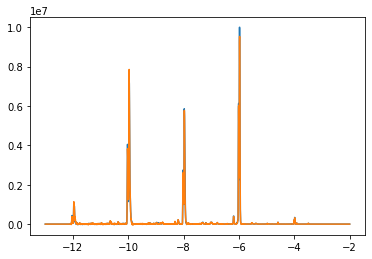

In [341]:
plt.figure
for idx in range(2):
    plt.plot(nData.ENS_data[idx].hh0,nData.ENS_data[idx].I)
#     plt.xlim([peak_center-plt_interval,peak_center+plt_interval])

##### Critical magnetic field 

In [91]:
Hc_0 = 0.51# value in Tesla units of the critical field at zero temperature
# in the absence of demagnetizing factor
# see data taken on needles of TmVO4-LS5200 in July 2017